In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../scripts')
# from object_detector import ObjectDetector
from matching_detector import MatchingDetector
from feature_extractor import FeatureDetector

t_matching = MatchingDetector('img')
f_detector = FeatureDetector()


## Feature extraction with OBR

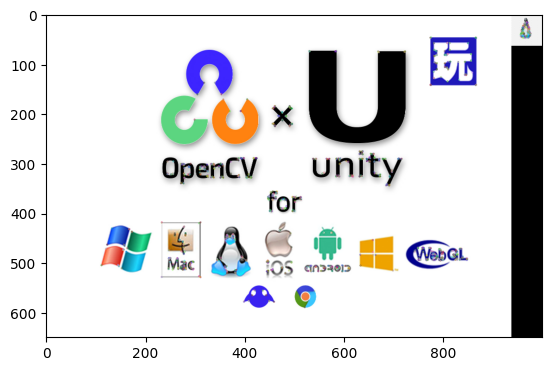

In [7]:
query_img = cv2.imread('../data/image.jpeg')
train_img = cv2.imread('../data/logo.png')
train_img = cv2.resize(train_img,(128,128))
        
# detect features on test image
queryKeypoints, trainKeypoints, matches =  f_detector.detectFeatures(query_img, train_img,0.50)
f_detector.plot_matching(matches,query_img,train_img,queryKeypoints,trainKeypoints)

## Logo and its position

(1094, 342) (838, 86)


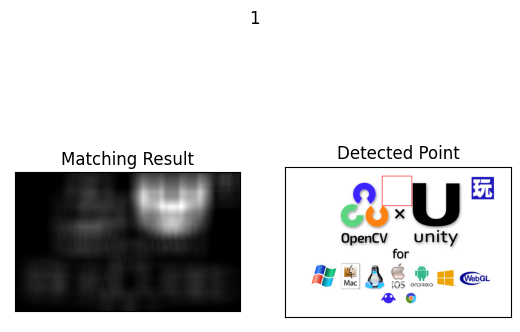

In [8]:
location, bottom_right,top_left, res, img = t_matching.template_matching_image('../data/logo.png', '../data/image.jpeg',method=cv2.TM_SQDIFF_NORMED)
in_loc, max_loc  = t_matching.get_location(res)
print(bottom_right,top_left)
t_matching.plot_matches(res,img, location,cv2.TM_SQDIFF_NORMED)

## Engagement text - location


In [ ]:
t_matching.template_matching_image(
     '../data/Challenge_Data/Assets/bf1f7af46eec0e92939a8b3ba51cbacd/logo.png', 
     '../data/Challenge_Data/Assets/bf1f7af46eec0e92939a8b3ba51cbacd/_preview.png')

## CTA Button

In [ ]:
t_matching.template_matching_image(
     '../data/Challenge_Data/Assets/bf1f7af46eec0e92939a8b3ba51cbacd/logo.png', 
     '../data/Challenge_Data/Assets/bf1f7af46eec0e92939a8b3ba51cbacd/_preview.png')

# object detection
- class id vector - object type
- bounding box - 

In [ ]:
od = ObjectDetector('img')
net = od.load_yolo()

### From image

In [ ]:
class_IDs, scores, bounding_boxs,img = od. detect_from_image('../data/dog.jpg',net)
print(class_IDs,bounding_boxs)
od.plot_detection(img,class_IDs, scores, bounding_boxs)

Shape of pre-processed image: (1, 3, 512, 683)


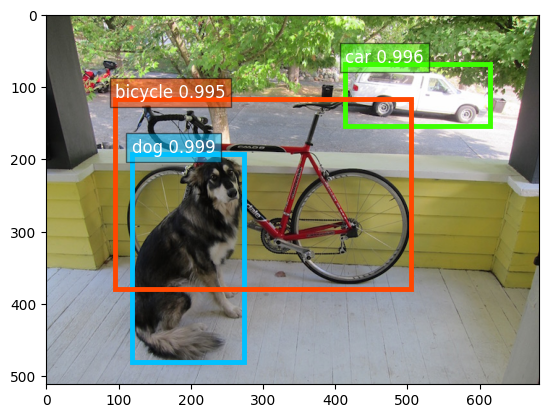

### Detecting From videos

In [ ]:
detection = od. detect_from_video(
    '../data/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854/video.mp4',net)
print(detection)
od.plot_detection(
    detection['img'][0],
    detection['class_IDs'][0], 
    detection['scores'][0], 
    detection['bounding_boxs'][0])

## Using feature extraction to detect logo

In [20]:
img = cv2.imread('../data/image.jpeg')
    # get train features
logo = cv2.imread('../data/logo.png')
train_features =  f_detector.getFeatures(img)
# detect features on test image
region =  f_detector.detectFeatures(logo, train_features)
print(region)
if region is not None:
    # draw rotated bounding box
    box = cv2.boxPoints(region)
    box = np.int0(box)
    cv2.drawContours(img, [box], 0, (0, 255, 0), 2)
# display the image
cv2.imwrite("Preview.png", img)

None


True

In [21]:
kps, descs, img = f_detector.getFeatures(img)

In [25]:
print(len(kps))
print(descs.shape)

2000
(2000, 32)
